# Spiegel historiael

## Preprocessing

In [33]:
import glob
import os
import shutil
import re
import unidecode
from itertools import product
from collections import Counter
import random

import numpy as np
RND = 12345
random.seed(RND)
np.random.seed(RND)

from scipy.spatial.distance import cdist, pdist
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use("seaborn-deep")

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestCentroid
from sklearn.preprocessing import normalize
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_recall_curve

from tqdm import tqdm
from inspect import signature

DIRTY = re.compile(r'\s*\-\+')

In [34]:
vocabulary = {}
parts = {'P2':[], 'P3': [], 'P5': []}
for part in sorted(os.listdir('data')):
    for fn in sorted(glob.glob(f'data/{part}/*.tag')):
        print(fn)
        with open(fn) as f:
            lines = f.readlines()
        chapter_rhymes = []
        for line in lines:
            line = line.strip()
            if not line or line.startswith('###'):
                continue
            try:
                words, rhyme = line.split('|')
                word = words.strip().split()[-1]
                if word not in vocabulary:
                    vocabulary[word] = Counter()
                vocabulary[word][rhyme] += 1
                chapter_rhymes.append(rhyme)
            except ValueError:
                print(line)
        parts[part].extend(chapter_rhymes)

data/P2/P2B1K1.tag
data/P2/P2B1K10.tag
data/P2/P2B1K11.tag
data/P2/P2B1K12.tag
data/P2/P2B1K13.tag
data/P2/P2B1K14.tag
data/P2/P2B1K15.tag
data/P2/P2B1K16.tag
data/P2/P2B1K17.tag
data/P2/P2B1K18.tag
data/P2/P2B1K19.tag
data/P2/P2B1K2.tag
data/P2/P2B1K20.tag
data/P2/P2B1K21.tag
data/P2/P2B1K22.tag
data/P2/P2B1K3.tag
data/P2/P2B1K37.tag
data/P2/P2B1K38.tag
data/P2/P2B1K39.tag
data/P2/P2B1K40.tag
data/P2/P2B1K41.tag
data/P2/P2B1K43.tag
data/P2/P2B1K45.tag
data/P2/P2B1K46.tag
data/P2/P2B1K47.tag
data/P2/P2B1K48.tag
data/P2/P2B1K49.tag
data/P2/P2B1K5.tag
data/P2/P2B1K50.tag
data/P2/P2B1K51.tag
data/P2/P2B1K52.tag
data/P2/P2B1K53.tag
data/P2/P2B1K54.tag
data/P2/P2B1K57.tag
data/P2/P2B1K58.tag
data/P2/P2B1K6.tag
data/P2/P2B1K7.tag
data/P2/P2B1K72.tag
data/P2/P2B1K77.tag
data/P2/P2B1K78.tag
data/P2/P2B1K79.tag
data/P2/P2B1K8.tag
data/P2/P2B1K80.tag
data/P2/P2B1K81.tag
data/P2/P2B1K82.tag
data/P2/P2B1K83.tag
data/P2/P2B1K84.tag
data/P2/P2B1K85.tag
data/P2/P2B1K86.tag
data/P2/P2B1K87.tag
data/P2

data/P3/P3B2K48.tag
data/P3/P3B2K5.tag
data/P3/P3B2K6.tag
data/P3/P3B2K7.tag
data/P3/P3B2K8.tag
data/P3/P3B2K9.tag
data/P3/P3B3K1.tag
data/P3/P3B3K10.tag
data/P3/P3B3K11.tag
data/P3/P3B3K12.tag
data/P3/P3B3K13.tag
data/P3/P3B3K14.tag
data/P3/P3B3K15.tag
data/P3/P3B3K16.tag
data/P3/P3B3K17.tag
data/P3/P3B3K18.tag
data/P3/P3B3K19.tag
data/P3/P3B3K2.tag
data/P3/P3B3K20.tag
data/P3/P3B3K21.tag
data/P3/P3B3K22.tag
data/P3/P3B3K23.tag
data/P3/P3B3K24.tag
data/P3/P3B3K25.tag
data/P3/P3B3K26.tag
data/P3/P3B3K27.tag
data/P3/P3B3K28.tag
data/P3/P3B3K29.tag
data/P3/P3B3K3.tag
data/P3/P3B3K30.tag
data/P3/P3B3K31.tag
data/P3/P3B3K32.tag
data/P3/P3B3K33.tag
data/P3/P3B3K34.tag
data/P3/P3B3K35.tag
data/P3/P3B3K36.tag
data/P3/P3B3K37.tag
data/P3/P3B3K38.tag
data/P3/P3B3K39.tag
data/P3/P3B3K4.tag
data/P3/P3B3K40.tag
data/P3/P3B3K41.tag
data/P3/P3B3K42.tag
data/P3/P3B3K43.tag
data/P3/P3B3K44.tag
data/P3/P3B3K45.tag
data/P3/P3B3K46.tag
data/P3/P3B3K47.tag
data/P3/P3B3K48.tag
data/P3/P3B3K49.tag
data/P3/P

data/P5/P5B5K40.tag
data/P5/P5B5K41.tag
data/P5/P5B5K46.tag
data/P5/P5B5K47.tag
data/P5/P5B5K48.tag
data/P5/P5B5K49.tag
data/P5/P5B5K5.tag
data/P5/P5B5K50.tag
data/P5/P5B5K51.tag
data/P5/P5B5K52.tag
data/P5/P5B5K6.tag
data/P5/P5B5K7.tag
data/P5/P5B5K8.tag
data/P5/P5B5K9.tag
data/P5/P5B6K1.tag
data/P5/P5B6K10.tag
data/P5/P5B6K11.tag
data/P5/P5B6K12.tag
data/P5/P5B6K13.tag
data/P5/P5B6K14.tag
data/P5/P5B6K15.tag
data/P5/P5B6K16.tag
data/P5/P5B6K17.tag
data/P5/P5B6K18.tag
data/P5/P5B6K19.tag
data/P5/P5B6K2.tag
data/P5/P5B6K20.tag
data/P5/P5B6K21.tag
data/P5/P5B6K22.tag
data/P5/P5B6K23.tag
data/P5/P5B6K24.tag
data/P5/P5B6K25.tag
data/P5/P5B6K26.tag
data/P5/P5B6K27.tag
data/P5/P5B6K28.tag
data/P5/P5B6K29.tag
data/P5/P5B6K3.tag
data/P5/P5B6K30.tag
data/P5/P5B6K31.tag
data/P5/P5B6K32.tag
data/P5/P5B6K4.tag
data/P5/P5B6K5.tag
data/P5/P5B6K6.tag
data/P5/P5B6K7.tag
data/P5/P5B6K8.tag
data/P5/P5B6K9.tag


In [35]:
lines = [line.strip() for line in open('data/fragment.txt')]

In [36]:
with open('data/fragment.lemma.txt', 'w') as f:
    for line in lines:
        words = line.split() 
        word = line.split()[-1]
        if '[…]' in word or '(…)' in word or '(.)' in word:
            continue
        words = []
        for word in line.split():
            words.append(''.join([c for c in word if c.isalpha()]))
        if words[-2] + '+' + words[-1] in vocabulary:
            rhyme_word = words[-2] + '+' + words[-1]
        else:
            rhyme_word = words[-1]
        try:
            lemma = vocabulary[rhyme_word].most_common(1)[0][0]
        except KeyError:
            try:
                rhyme_word = rhyme_word.replace('u', 'v')
                lemma = vocabulary[rhyme_word].most_common(1)[0][0]
            except KeyError:
                print(rhyme_word)
                lemma = 'XXX'
        f.write(' | '.join((line, lemma.upper())) + '\n')

de
hijt
bescede
delijchede
sigvitvs

ver
qvaede
goderannvs
oe
ihesvs
nevelachticheit
menechfoldechede
bliscap
heerscap
blodelike
lelike
v
nv
intbegin
fantome
vvt
hameide
gesceide
natgone


In [38]:
fragment = [line.strip().split('|')[-1].strip() for line in open('data/fragment.lemma_correct.txt')]
fragment

['DAT',
 'MET',
 'NEVEN',
 'AAN',
 'HEER',
 'ZEER',
 'XXX',
 'KONING',
 'ZEER',
 'HEER',
 'ZAAN',
 'VANGEN',
 'WIL',
 'STIL',
 'ZIJN',
 'MEDE',
 'BIJ',
 'VRIJ',
 'LEZEN',
 'ZIJN',
 'WETEN',
 'GEREED',
 'TEHAND',
 'JAGER',
 'LIGGEN',
 'SCHOOT',
 'DOEN',
 'STAD',
 'BLOOT',
 'HOEDEN',
 'ZAAN',
 'WAAN',
 'HETEN',
 'ZIEN',
 'XXX',
 'TIJD',
 'ZIEN',
 'GESCHIEDEN',
 'NIET',
 'IET',
 'BESCHEID',
 'DAARMEDE',
 'DAN',
 'KUNNEN',
 'MET',
 'ZETTEN',
 'MEDE',
 'STAD',
 'LIEDEN',
 'GESCHIEDEN',
 'DOEN',
 'MEDE',
 'SCHULD',
 'MENIGVOUD',
 'DING',
 'ONDERLING',
 'XXX',
 'STOND',
 'MOND',
 'HEER',
 'ZEER',
 'DAAR',
 'WAAR',
 'PrName',
 'ALDUS',
 'DAARTOE',
 'TOEN',
 'DOEN',
 'MET',
 'ZETTEN',
 'ZULLEN',
 'HOUD',
 'MEER',
 'ZEER',
 'SPREKEN',
 'BREKEN',
 'DOEN',
 'MEDE',
 'ALZO',
 'ALTOEN',
 'WERF',
 'BEDERVEN',
 'DOEN',
 'ZALIGHEID',
 'DOEN',
 'HETEN',
 'GESCHIEDEN',
 'ZAAN',
 'XXX',
 'MEDE',
 'XXX',
 'DAARNAAR',
 'VOORWAAR',
 'GEVEN',
 'GENE',
 'GEMEEN',
 'MOND',
 'STOND',
 'HEER',
 'MEER',
 'DAARNAAR

In [39]:
fragment = [l for l in fragment if l != 'XXX']
fragment

['DAT',
 'MET',
 'NEVEN',
 'AAN',
 'HEER',
 'ZEER',
 'KONING',
 'ZEER',
 'HEER',
 'ZAAN',
 'VANGEN',
 'WIL',
 'STIL',
 'ZIJN',
 'MEDE',
 'BIJ',
 'VRIJ',
 'LEZEN',
 'ZIJN',
 'WETEN',
 'GEREED',
 'TEHAND',
 'JAGER',
 'LIGGEN',
 'SCHOOT',
 'DOEN',
 'STAD',
 'BLOOT',
 'HOEDEN',
 'ZAAN',
 'WAAN',
 'HETEN',
 'ZIEN',
 'TIJD',
 'ZIEN',
 'GESCHIEDEN',
 'NIET',
 'IET',
 'BESCHEID',
 'DAARMEDE',
 'DAN',
 'KUNNEN',
 'MET',
 'ZETTEN',
 'MEDE',
 'STAD',
 'LIEDEN',
 'GESCHIEDEN',
 'DOEN',
 'MEDE',
 'SCHULD',
 'MENIGVOUD',
 'DING',
 'ONDERLING',
 'STOND',
 'MOND',
 'HEER',
 'ZEER',
 'DAAR',
 'WAAR',
 'PrName',
 'ALDUS',
 'DAARTOE',
 'TOEN',
 'DOEN',
 'MET',
 'ZETTEN',
 'ZULLEN',
 'HOUD',
 'MEER',
 'ZEER',
 'SPREKEN',
 'BREKEN',
 'DOEN',
 'MEDE',
 'ALZO',
 'ALTOEN',
 'WERF',
 'BEDERVEN',
 'DOEN',
 'ZALIGHEID',
 'DOEN',
 'HETEN',
 'GESCHIEDEN',
 'ZAAN',
 'MEDE',
 'DAARNAAR',
 'VOORWAAR',
 'GEVEN',
 'GENE',
 'GEMEEN',
 'MOND',
 'STOND',
 'HEER',
 'MEER',
 'DAARNAAR',
 'ALDAAR',
 'MOGEN',
 'BRENGEN',
 'Pr

In [40]:
size = len(fragment)
print(size)

198


In [41]:
fragment = ' '.join(fragment)
fragment

'DAT MET NEVEN AAN HEER ZEER KONING ZEER HEER ZAAN VANGEN WIL STIL ZIJN MEDE BIJ VRIJ LEZEN ZIJN WETEN GEREED TEHAND JAGER LIGGEN SCHOOT DOEN STAD BLOOT HOEDEN ZAAN WAAN HETEN ZIEN TIJD ZIEN GESCHIEDEN NIET IET BESCHEID DAARMEDE DAN KUNNEN MET ZETTEN MEDE STAD LIEDEN GESCHIEDEN DOEN MEDE SCHULD MENIGVOUD DING ONDERLING STOND MOND HEER ZEER DAAR WAAR PrName ALDUS DAARTOE TOEN DOEN MET ZETTEN ZULLEN HOUD MEER ZEER SPREKEN BREKEN DOEN MEDE ALZO ALTOEN WERF BEDERVEN DOEN ZALIGHEID DOEN HETEN GESCHIEDEN ZAAN MEDE DAARNAAR VOORWAAR GEVEN GENE GEMEEN MOND STOND HEER MEER DAARNAAR ALDAAR MOGEN BRENGEN PrName ALDUS DAARNAAR DAAR MOND STOND GEDOEN MEDE WIJDEN DIET IN MEDE STAD GROOT GEMOED ZIJN DAT ALDUS VOORWAAR PrName DUS WEERSTAAN WAAN NEVELACHTIGHEID ARBEID DAAR VOORWAAR ONTFERMIGHEID MEDE NACHT BRENGEN MENIGVULDIGHEID KLAARHEID ZIJN DAT ZEER KEER NACHT BRENGEN TAAL ALZOWEL STAD MEDE TIJD VERBLIJD VIJAND BEKEND BLIJSCHAP HEERSCHAP HOREN WOORD BLOEDELIJK LELIJK MEDE STAD GIJ NU IN BEGIN VERDI

In [42]:
for k, v in parts.items():
    print(k, len(v))

P2 32312
P3 31175
P5 18652


In [43]:
data = []
for part, rhymes in parts.items():
    si, ei = 0, size
    while ei < len(rhymes):
        data.append([part, ' '.join(rhymes[si:ei])])
        si += size
        ei += size

In [44]:
import pandas as pd
src = pd.DataFrame(data, columns=('part', 'rhymes'))

In [45]:
src.head()

,part,rhymes
0,P2,EIND VINDEN GROOT DOOD BLIJVEN WIJF DEZ...
1,P2,DOEN PrName PrName VOLDOEN BEGINNEN STON...
2,P2,POORT MOORD VERDERVEN VERWERVEN SLAAN ON...
3,P2,RIJK ZEKERLIJK KONING DING AAN DAN BLOO...
4,P2,TOVERAAR OPENBAAR KLEED ONGEREED MEER EE...


In [46]:
p_word = {'use_idf': True,
     'max_features': None,
     'analyzer': 'word',
     'min_df': 1,
     'lowercase': False,
     'norm': 'l1',
     'ngram_range': (1, 1)}

In [47]:
vectorizer = TfidfVectorizer(**p_word)
scaler = StandardScaler()

In [48]:
X = vectorizer.fit_transform(src['rhymes']).toarray()
X = scaler.fit_transform(X)

In [49]:
fragment = vectorizer.transform([fragment]).toarray()
fragment = scaler.transform(fragment)[0]

In [50]:
print(X.shape, fragment.shape)

(414, 3883) (3883,)


In [51]:
class Verifier():
    def __init__(self, iters=100, 
                 rnd_prop=.5, random_state=1066,
                 num_instances=30, metric='cosine',
                 rnd_state=1234):
        assert (rnd_prop >= 0.0) and (rnd_prop <= 1.0)
        
        np.random.seed(rnd_state)
        self.iters = iters
        self.rnd_prop = rnd_prop
        self.num_instances = num_instances
    
    def predict_proba(self, target, source_X, imposter_X):
        """
        target = (single) anonymous text
        source_X = candidate author
        imposter_X = imposter documents
        """
        total_features = imposter_X.shape[1]
        total_imposters = imposter_X.shape[0]
        total_source = source_X.shape[0]
        target = np.array([target])
        hits = np.zeros(self.iters)
            
        for it in range(self.iters):
            imposters_ = imposter_X[np.random.choice(total_imposters, self.num_instances, replace=False), :]
            source_ = source_X[np.random.choice(total_source, self.num_instances, replace=False), :]
            
            if self.rnd_prop < 1.0:
                idxs = np.random.choice(total_features, int(total_features * self.rnd_prop), replace=False)
                imposters_ = imposters_[:, idxs]
                source_ = source_[:, idxs]
                target_ = target[:, idxs]
            
            min_imp_dist = np.min(cdist(target_, imposters_, metric='cosine'))
            min_src_dist = np.min(cdist(target_, source_, metric='cosine'))
            
            if min_src_dist < min_imp_dist:
                hits[it] = 1
        
        return np.mean(hits)

In [52]:
authors = set(src['part'])
authors

{'P2', 'P3', 'P5'}

In [53]:
for author in authors:
    src_X = X[src['part'] == author]
    imposters_X = X[src['part'] != author]
    
    verifier = Verifier(iters=1000, num_instances=5)
    proba = verifier.predict_proba(target=fragment, source_X=src_X,
                                   imposter_X=imposters_X)
    print(f'::: {author} > {proba} :::')

::: P5 > 0.723 :::
::: P3 > 0.319 :::
::: P2 > 0.443 :::


In [54]:
train_parts, dev_parts, train_rhymes, dev_rhymes = train_test_split(src['part'], src['rhymes'],
                                                                        test_size=.25,
                                                                        stratify=src['part'],
                                                                        random_state=42)

In [55]:
train_X = vectorizer.fit_transform(train_rhymes).toarray()
train_X = scaler.fit_transform(train_X)

In [56]:
dev_X = vectorizer.transform(dev_rhymes).toarray()
dev_X = scaler.transform(dev_X)

In [57]:
def experiment(candidate):
    source = train_X[train_parts == candidate]
    imposters = train_X[train_parts != candidate]
    targets = dev_X
    target_y = np.array([1 if a == candidate else 0 for a in dev_parts])

    verifier = Verifier(iters=1000, num_instances=5)
    probas = [verifier.predict_proba(target=t, source_X=source,
                           imposter_X=imposters) for t in tqdm(targets)]

    precision, recall, thresholds = precision_recall_curve(target_y, probas)
    f1s = [f1_score(target_y, (probas > th) * 1) for th in thresholds]
    
    max_idx = np.array(f1s).argmax()
    max_f1 = f1s[max_idx]
    max_th = thresholds[max_idx]
    print(max_f1, max_th)
    
    plt.figure(figsize=(10, 10))
    step_kwargs = ({'step': 'post'}
                   if 'step' in signature(plt.fill_between).parameters
                   else {})
    plt.step(recall, precision, color='b', alpha=0.2,
             where='post')
    plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])

    plt.plot(recall[max_idx], precision[max_idx], 'o')
    plt.axhline(precision[max_idx])
    plt.axvline(recall[max_idx])
    plt.title(f'{candidate} | f1={round(max_f1, 4)} @ theta={round(max_th, 4)}')
    plt.savefig(f'{candidate}.pdf')
    

100%|██████████| 104/104 [00:42<00:00,  2.44it/s]
/Users/mikekestemont/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
  0%|          | 0/104 [00:00<?, ?it/s]

0.963855421686747 0.538


  0%|          | 0/104 [00:00<?, ?it/s]

0.9620253164556962 0.579


100%|██████████| 104/104 [00:43<00:00,  2.40it/s]


0.9787234042553191 0.562


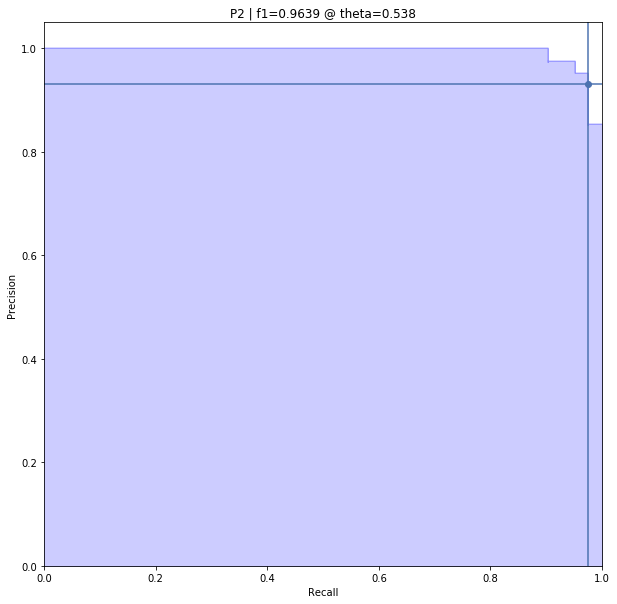

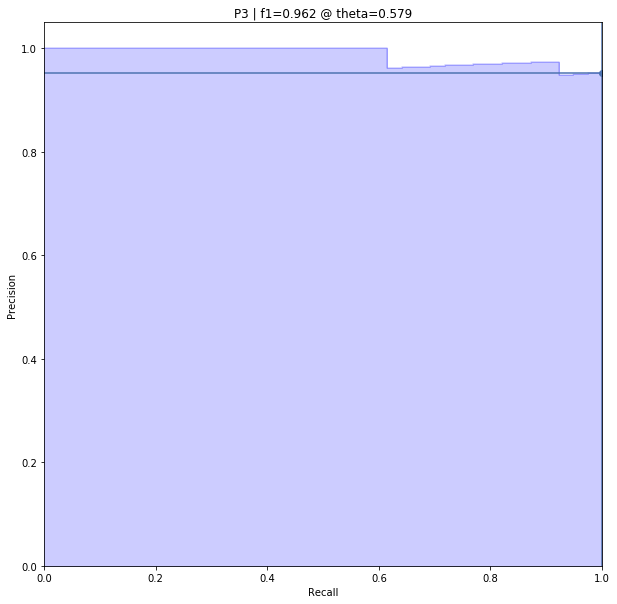

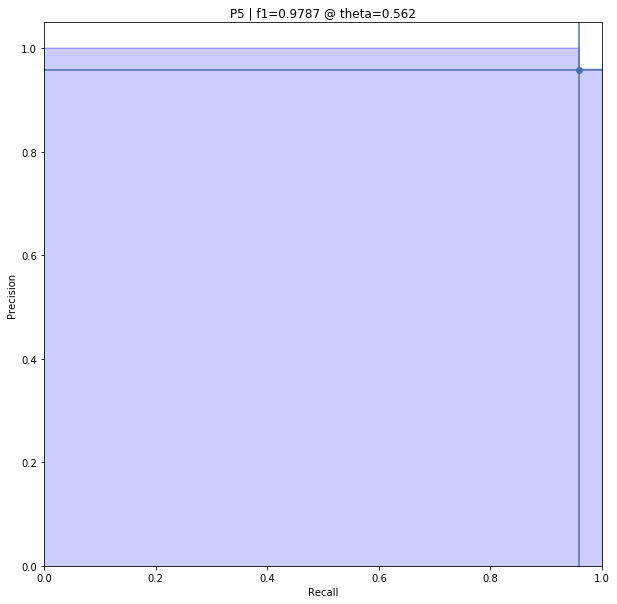

In [58]:
for candidate in 'P2 P3 P5'.split():
    experiment(candidate)